In [2]:
import PIL
import ephem
import datetime
import matplotlib         as    mpl
import pylab              as    pl
import numpy              as    np
import matplotlib.pyplot  as    plt
import matplotlib.patches as    patches

from   IPython.display   import Image
from   matplotlib        import animation, rc
from   IPython.display   import HTML
from   PIL               import Image as PImage
from   IPython.display   import YouTubeVideo

In [3]:
%matplotlib inline

# From Maya to DESI

From 1800 BC to 900 AD, the Maya civilization excelled at agriculture, pottery, hieroglyph writing, calendar-making and mathematics across present day Honduras, Mexico, Guatemala and Belize. With an astonishing legacy of architecture and symbolic artwork, their formidable understanding of the heavens is perhaps the most impressive - certainly to us!

The Maya were expert sky-watchers, careful observers of the motions of the celestial bodies. Proof of the Mayan fascination with astronomy is carved into stone at the grand architecture sites of Chichén Itzá, Uxmal, Uaxactun, Edzna, and many more. As we'll see (!), often the buildings they adorn have been built to align with significant cyclical astronomical events—solstices, equinoxes, the shifting moon, or the rise of planets.

<img src="images/ChichenItza.jpg" alt="Drawing" style="width: 800px;"/>

At Chichén Itzá, two structures bear witness to Mayan astronomy: Kukulkan and El Caracol.  Kukulkan, or El Castillo - 'the castle' - in Spanish, at the center of Chichén Itzá is a 79-foot pyramid of stone.  Every year, tens of thousands of visitors flock to Chichén Itzá to see 'the snake', an apparition made of shadows that descends the stairs at El Castillo during the solar equinoxes each spring and fall.  

This famous event occurs twice each year, at the spring and fall equinoxes. (In fact, the effect is viewable for a week before and after each equinox.)  As the equinox sun sets, a play of light and shadow creates the appearance of a snake that gradually undulates down the stairway of the pyramid. This diamond-backed snake is composed of seven or so triangular shadows, cast by the stepped terraces of the pyramid. The sinking sun seems to give life to the sinuous shadows, which make a decidedly snaky pattern on their way down the stairs.

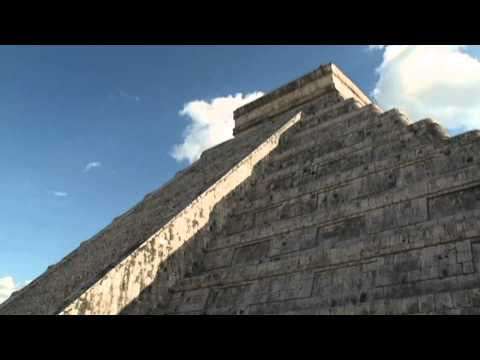

In [4]:
YouTubeVideo('Zvv9EnBuem4', width=800, height=400)

Using the awesome Ephem package, let's see how this works!  First we'll define our sun, and the Mayan's favourite planet.  These 'class instances' allow us to ask them later on at what position the sun is at a given time, for instance.   

In [5]:
venus = ephem.Venus()
sun   = ephem.Sun()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec, ephem.constellation(venus)[1])

8:28:58.50 17:51:55.0 Cancer


So Venus is in the Cancer constellation tonight!  We'll also define the position (latitude and longitude of our Mayan astronomer).

In [6]:
caracol         = ephem.Observer()

# Ordinary latitude and longitude of El Carcarol at Chichen Itza.
caracol.lat     = '20.683056'
caracol.lon     = '-88.568611'

# 
caracol.horizon = 0.0

In [7]:
def solar_position(year, date=None, event="next_rise", ephem_event=ephem.next_equinox):
    if date != None:
        # Return solar position at event of a known date. 
        caracol.date = date
        
        sun.compute(caracol)
        
        return  sun.az, sun.alt 
               
    else:
        # Determines date and alzimuthal position of the sun for a named event, e.g. solstice or equinox. 
        if event == "next_rise":
            caracol.date = caracol.next_rising(sun, start=ephem_event(year), use_center=True)

        elif event == "prev_setting":
            caracol.date = caracol.previous_setting(sun, start=ephem_event(year), use_center=True)
    
        elif event == "next_setting":
            caracol.date = caracol.next_setting(sun, start=ephem_event(year), use_center=True)
        
        else:
            raise  ValueError("Unacceptable event!")
        
        sun.compute(caracol)
 
        return  ephem.localtime(caracol.date), sun.az

In [8]:
year                 = '2021'

saz, salt            = solar_position(date='551/12/22 16:45:40', year='2021')

# Time and azimuthal positon of the rising and setting sun on the equinox - day on which length of night = length of day.
equinox_rise         = solar_position(year, event="next_rise", ephem_event=ephem.next_equinox)
equinox_set          = solar_position(year, event="prev_setting", ephem_event=ephem.previous_equinox)

# Time and azimuthal positon of the rising and setting sun on the winter solstice - shortest day of the year. 
winter_solstice_set  = solar_position(year, event="next_setting", ephem_event=ephem.previous_solstice)
winter_solstice_rise = solar_position(year, event="next_rise", ephem_event=ephem.previous_solstice)

# Time and azimuthal positon of the rising and setting sun on the summer solstice - longest day of the year. 
summer_solstice_set  = solar_position(year, event="next_setting", ephem_event = ephem.next_solstice)
summer_solstice_rise = solar_position(year, event="next_rise", ephem_event = ephem.next_solstice)

_HERE WE EXPLAIN HOW KUKULKAN IS ALIGNED WITH THESE EVENTS AND MOTIVATE THE PLOTS TO COME._

_TO BE EDITED_:  Other features of El Castillo suggest astronomical understanding and intent on the part of the Mayan builders. The structure as a whole seems to be aligned with an important astronomical axis: The west plane of the pyramid faces the zenith passage sunset. Meanwhile, each of the four (exceedingly steep) stairways that climb the pyramid has 91 steps, with a final step at the top making a total of 365, the number of days in a solar year. Ninety-one is also the number of days that separate each of the four phases of the annual solar cycle: winter solstice, spring equinox, summer solstice, and fall equinox.

In [9]:
# Lets define some lines and angles to be used in our design, based on what we computed. 
def line(x,m):
    return np.tan(-m+np.pi/2)*x

def draw_lines(x,y,text=None):
    for i in range(3):
        ax.plot(x,y[i])
        
        ax.scatter(x[4],y[i][4],marker='o',color='black')
        ax.scatter(x[25],y[i][25],marker='o',color='black')
        
        if text!=None:
            ax.text(x[4]-2,y[i][4]+1,text[i][0])
            ax.text(x[25]-14,y[i][4]+1,text[i][1])
    
def draw_kukulkan(ax):
    for i in range (2,10):
        j=12-i
        if (j==3):rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='black', alpha=0.5)
        else: rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='red', alpha=0.2)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)
            #ax.add_patch(rectangle2)

    for i in range (4):
        a=[[-1.5,3],[-1.5,-11],[3,-1.5],[-11,-1.5]]
        if i<=1:rectangle=patches.Rectangle((a[i]),3,8, color='black', alpha=0.5)
        else:rectangle=patches.Rectangle((a[i]),8,3, color='black', alpha=0.5)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)

In [10]:
x         = np.linspace(-30,30,30)
y         = [line(x,equinox_rise[1]),line(x,summer_solstice_set[1]),line(x,summer_solstice_rise[1])]

angle     =(-summer_solstice_rise[1]+np.pi/4)/np.pi*180
anglerad  = -summer_solstice_rise[1]+np.pi/4

rayshighx = np.array([x[4],10*(-np.cos(anglerad)-np.sin(anglerad))])
rayshighy = np.array([y[2][4],10*(np.cos(anglerad)-np.sin(anglerad))])
rayslowx  = np.array([x[4],10*(np.cos(anglerad)+np.sin(anglerad))])
rayslowy  = np.array([y[2][4],10*(-np.cos(anglerad)+np.sin(anglerad))])

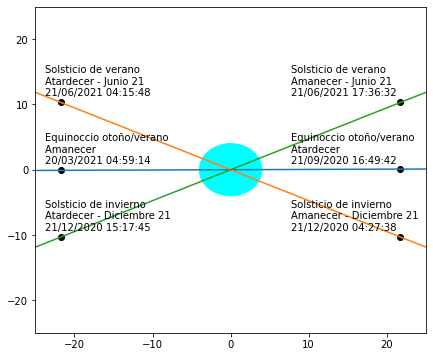

In [11]:
fig1,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
text=[["Equinoccio otoño/verano\nAmanecer \n%s"%equinox_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Equinoccio otoño/verano\nAtardecer \n%s" %equinox_set[0].strftime("%d/%m/%Y %H:%M:%S")],
     ["Solsticio de verano\nAtardecer - Junio 21\n%s"%summer_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de verano\nAmanecer - Junio 21\n%s"%summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S")],
    ["Solsticio de invierno\nAtardecer - Diciembre 21\n%s"%winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de invierno\nAmanecer - Diciembre 21\n%s" %winter_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S")]]

draw_lines(x,y,text=text)
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)

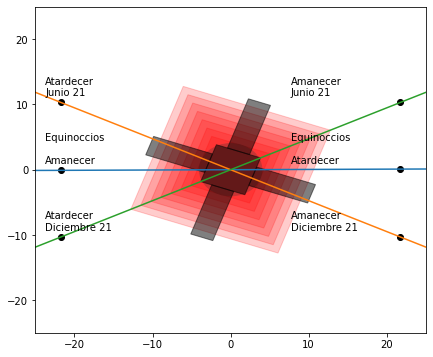

In [12]:
fig2,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
text=[["Equinoccios\n\nAmanecer","Equinoccios\n\nAtardecer"],
      ["Atardecer\nJunio 21","Amanecer\nJunio 21"],["Atardecer\nDiciembre 21","Amanecer\nDiciembre 21"]]
draw_lines(x,y,text=text)   
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_kukulkan(ax=ax)

Text(-21.724137931034484, -17.312279822255608, 'Atardecer - 21/12/2020 15:17:45\nSombra completa en mitad de la pirámide')

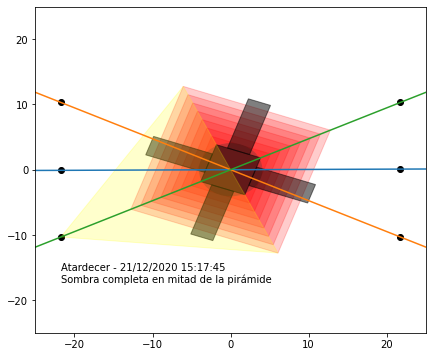

In [13]:
fig3,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

for i in range(3):
    ax.plot(x,y[i])
    ax.scatter(x[4],y[i][4],marker='o',color='black')
    ax.scatter(x[25],y[i][25],marker='o',color='black')
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_kukulkan(ax=ax)
ax.fill(np.append(rayshighx, rayslowx[::-1]),np.append(rayshighy, rayslowy[::-1]), color='yellow', alpha=0.2)
ax.text(x[4],y[2][4]-7,"Atardecer - %s\nSombra completa en mitad de la pirámide" %winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))

Text(-21.724137931034484, 15.311100872526993, 'Atardecer - 21/06/2021 17:36:32\nSe iluminan escalones de la serpiente (los 7 triángulos de luz)')

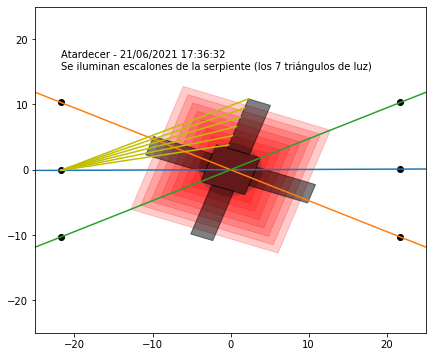

In [14]:
fig4,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

for i in range(3):
    ax.plot(x,y[i])
    ax.scatter(x[4],y[i][4],marker='o',color='black')
    ax.scatter(x[25],y[i][25],marker='o',color='black')
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_kukulkan(ax=ax)

for i in range(6):
            raystairsx=np.array([x[4],-1.5*np.cos(anglerad)-(11-i*1.5)*np.sin(anglerad)])
            raystairsy=np.array([y[0][4],(11-i*1.5)*np.cos(anglerad)-1.5*np.sin(anglerad)])
            ax.plot(raystairsx,raystairsy,'y-')
ax.text(x[4],y[1][4]+5,"Atardecer - %s\nSe iluminan escalones de la serpiente (los 7 triángulos de luz)" %summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))

Text(120, 70, 'Chichen Itza: 20.6829703, -88.5692032\nTu locación: 20:40:59.0, -88:34:07.0')

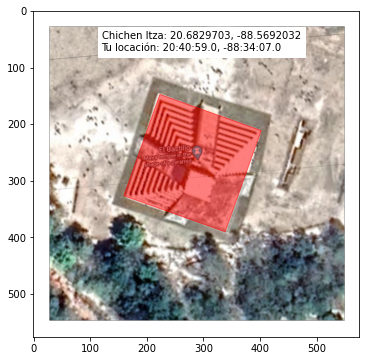

In [15]:
fig5,ax= plt.subplots(figsize=(7,6))
img= plt.imread("images/kukulkan.png")
ax.imshow(img)
rectangle=patches.Rectangle((188,178),190,190, color='red', alpha=0.5)
t = mpl.transforms.Affine2D().rotate_deg_around(294,264,-angle+0*45) + ax.transData
rectangle.set_transform(t)
ax.add_patch(rectangle)

ax.text(120,70,"Chichen Itza: 20.6829703, -88.5692032\nTu locación: {}, {}".format(caracol.lat, caracol.lon), backgroundcolor='white')

Minutes walk from Kukulkan, 'El Caracol' Obseravatory was central to the serious business of Mayan Astronomy, where observations of Venus were of (almost) religious importance.

<img src="images/caracol.jpg" alt="Drawing" style="width: 800px;"/>

Caracol, like Kukulkan, was carefully aligned with the motions of Venus as 'he' (for the Mayans) held tremendous significance; this bright planet was considered the sun’s twin and a war god. Mayan leaders used the changing position of Venus to plan appropriate times for raids and battles.  At El Caracol, dubbed 'the observatory', narrow shaftlike windows frame important astronomical events. One such window marks an appearance of Venus at a particular point on the horizon that takes place—like clockwork—once every eight years.

Let's use ephem to observe and understand Venus, as the Mayans once did at Caracol.

In [16]:
# First rising date time:  2020/1/2 03:01:29
# First sun rise;  print(chichen_itza.previous_rising(sun))

# Define our first observation on 1st January 2020, at 23:52 and a bit!
start_date         = datetime.datetime(2020, 1,   1)
start_time         = datetime.time(23, 52, 2)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

# We'll calculate the positions of Venus up until 2030. 
end_date           = datetime.datetime(2030, 1, 1)

# every hour. 
delta              = datetime.timedelta(hours=1)

# Store the date and time of 'each observation'.
datetimes          = []

# Store the angular position. 
angular_pos        = []

# Will store the [magnitude (brightness), diameter in arcseconds, distance from the Earth, phase, and separation
# of Venus from the sun in degrees (elongation or elong)].
props              = []

# Store the time of sunrise on each day. 
sunrises           = []

while start_datetime  <= end_date:    
    start_datetime += delta
    
    # Set our date and time of observation. 
    caracol.date    = start_datetime.strftime("%Y/%m/%d %H:%M:%S")

    # Calculate everything for the sun and Venus. 
    sun.compute(caracol)
    venus.compute(caracol)
    
    datetimes.append(start_datetime)

    props.append([venus.mag, venus.size, venus.earth_distance, venus.phase, venus.elong])
    
    # alt or altitude is the height of the sun and Venus above the horizon in degrees.  An altitude of 90 deg. would 
    # be right above you!  This is also known as the 'zenith' amongst the pros. 
    angular_pos.append([caracol.date, sun.alt, venus.az, venus.alt])

    sunrises.append(caracol.previous_rising(sun))
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [17]:
# We've been collecting things in 'lists', but convert to numpy arrays as much easier to do calculations.
angular_pos = np.array(angular_pos)
props       = np.array(props)
sunrises    = np.array(sunrises)

In [18]:
# Convert from randians to degrees.
angular_pos[:,1:] *= 180. / np.pi

In [19]:
# Sunrises is a series of numbers that represent the date and time of the observation, with a bigger number being a 
# later observation.  Here, we're going to start are clock at the time when we see venus and the sun are closely together.
sunrises   -= 44567

In [20]:
# A list of the colors for the lines we will plot.
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(567, 0.75, 'Inferior \n Conjunction')

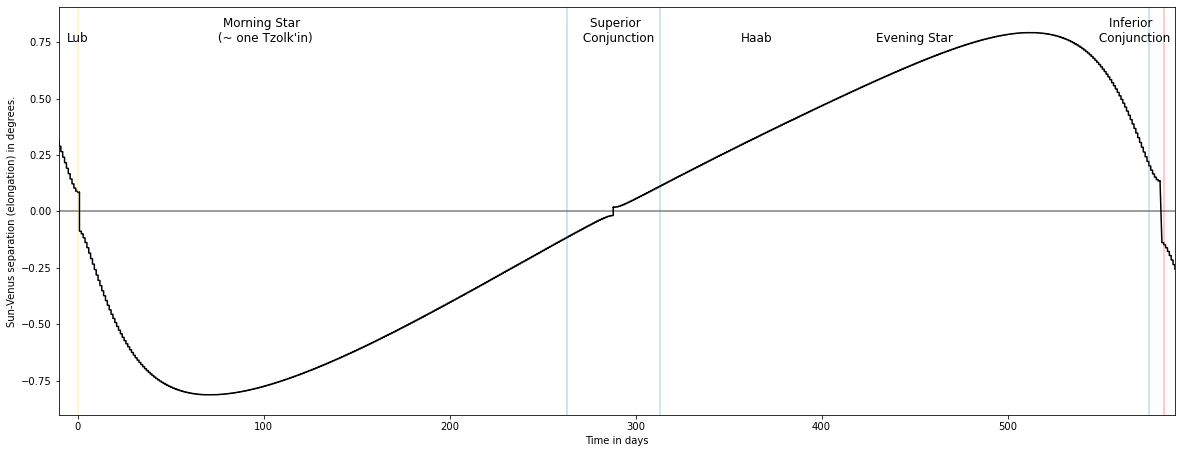

In [21]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, props[:,-1], c='k')
    
ax.set_xlabel('Time in days')
ax.set_ylabel('Sun-Venus separation (elongation) in degrees.')

ax.set_xlim(left=-10, right=590)
    
ax.axhline(0.0, alpha=0.5, c='k')
    
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
ax.text(x=0,   y=0.75, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=0.75, s='Morning Star \n (~ one Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=0.75, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=0.75, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=0.75, s='Evening Star', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=0.75, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)
    
# pl.savefig('images/venus.pdf')

For the Mayans, this was an incredibly special curve!  So much so, they designed (one of) their calendars, the Tzolk'in, based on it!  This calendar would start on the Lub, when venus was so close to the sun ('elongation' $\simeq 0.0$) that it would be hidden completely.  Soon, as you watched the horizon close to sunrise each day, Venus would become a 'Morning Star' - Venus would rise above the horizon up to a few hours before the brightness of the Sun rise would drown it out.  Why not wake up early one day and see!

Venus would continue to be a Morning Star for 263 days, at which point the paths of the Sun and Venus would be so close each day that the Sun's brightness would shield it completely.  In amateur and professional astronomy, this is known as the 'Superior Conjunction', which lasts for 50 days.  The 263 days duration of the Morning Star would go on to define the Tzolk'in year. 

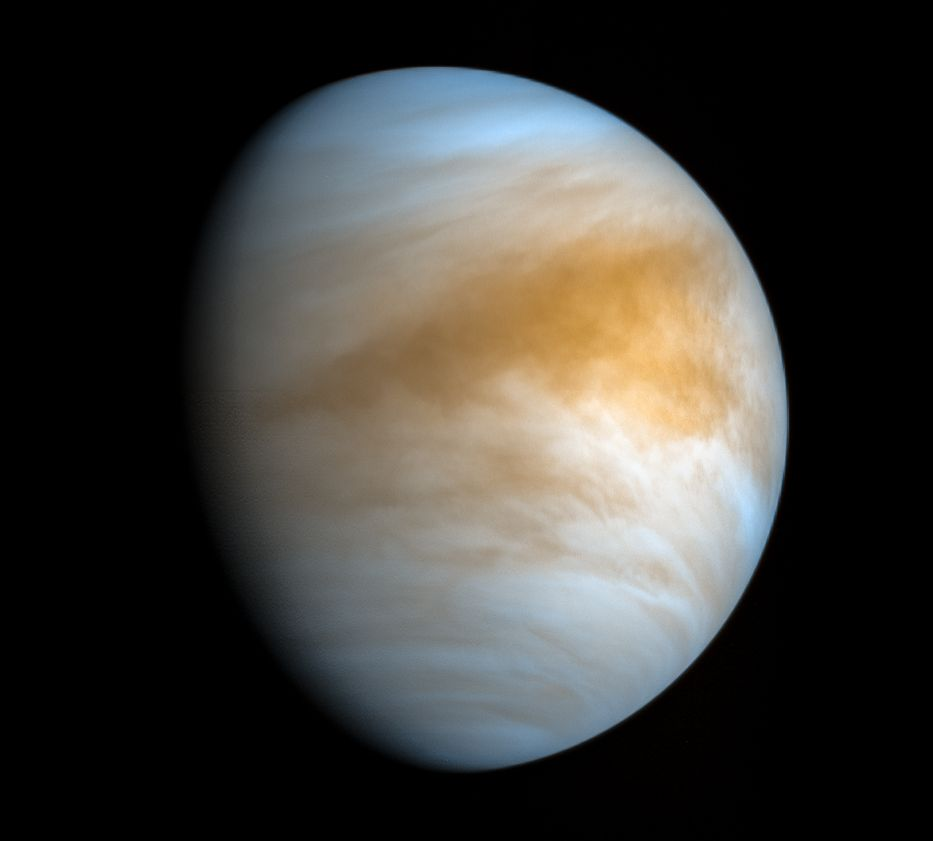

In [22]:
Image(filename='images/venus.jpg')

We're now 365 days in, a year to us or a Haab to the Mayans!  By this point, Venus is an 'Evening star':  now on the other side of the Sun, it’s trailing the Sun in the sky and brightens into view shortly after the Sun sets, when the sky is dark enough for it to be visible. When Venus is at its brightest, it becomes visible just minutes after the Sun goes down.

The `Inferior conjuntion' closes out the 'synodic period' of Venus, exactly the same as the superior but for a much shorter 8 days.  At the end of the synodic period, 584 days, Ground Hog day begins again for Venus as everything then repeats!

So complicated is Venus’s disappearing act that the ancient Greeks misconstrued it as two different stars. The Mayans knew better, and they recognized Venus in both the morning and evening skies as one and the same.

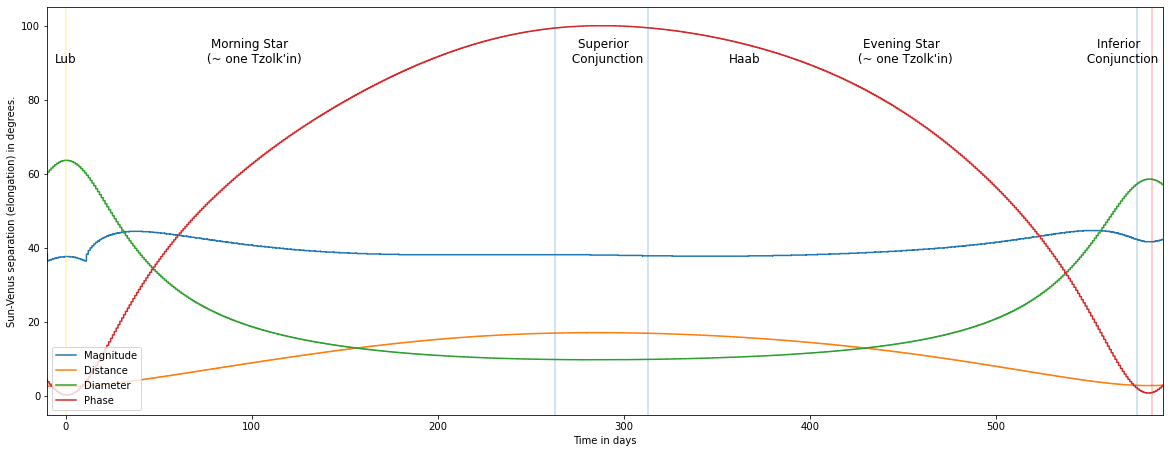

In [23]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, -10. * props[:,0], label='Magnitude')
ax.plot(sunrises,  10. * props[:,2], label='Distance')
ax.plot(sunrises,        props[:,1], label='Diameter')
ax.plot(sunrises,        props[:,3], label='Phase')    
    
ax.set_xlabel('Time in days')
ax.set_ylabel('Sun-Venus separation (elongation) in degrees.')

ax.set_xlim(left=-10, right=590)
        
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
yy = 90.
    
ax.text(x=0,   y=yy, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=yy, s='Morning Star \n (~ one Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=yy, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=yy, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=yy, s='Evening Star \n (~ one Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=yy, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)

ax.legend(frameon=True, loc=3)

It just so happens that the synodic period of Venus (584 days) relates to the orbital period of the earth (365 days) in a relatively simple ratio of 5:8. Five times the synodic period of Venus (5 x 584 days) is 2,920 days. If you divide 2,920 by the 365 days in our year, you get 8. In short, the motions of Venus relative to our sun repeat almost exactly every 8 years. Eight years was a fundamental interval for ancient Mayans, who relied heavily on natural cycles.

Let's see how the Mayans recorded this in 500 AD! 

In [24]:
# We'll calculate the angular position of Venus for each of the five synodic cycles (584 day) that's required for things to repeat.
cycles        = {}

In [25]:
for i in range(5):
  zero        = 584. * i

  # Sun is above the horizon.
  in_cycle    = (sunrises >= zero)        & (sunrises < zero + 585.) & (angular_pos[:,1] > 0.)

  in_morning  = (sunrises >= zero)        & (sunrises < zero + 263.) & (angular_pos[:,1] > 0.)
  in_superior = (sunrises >= zero + 263.) & (sunrises < zero + 313.) & (angular_pos[:,1] > 0.)
  in_evening  = (sunrises >= zero + 313.) & (sunrises < zero + 576.) & (angular_pos[:,1] > 0.)
  in_inferior = (sunrises >= zero + 576.) & (sunrises < zero + 584.) & (angular_pos[:,1] > 0.)

  cycles[i]   = [in_morning, in_superior, in_evening, in_inferior]

In [26]:
labels        = ['Morning Star', 'Superior', 'Evening Star', 'Inferior'] 

def plot_mayan(cycle, epoch, ext=None):
  fig, ax     = plt.subplots(1, 1, figsize=(15, 5.))

  im          = PImage.open('images/Mayan_Morning_{}.png'.format(cycle))  
    
  width, height = im.size

  size        = 256, 256
  im.thumbnail(size, PImage.ANTIALIAS)

  im          = np.array(im).astype(np.float) / 255 

  color       = color_cycle[cycle]
  sample      = cycles[cycle][epoch]
  label       = labels[epoch]

  # for i, (color, sample, label) in enumerate(zip(color_cycle, cycles[j], labels)):
  ax.plot(angular_pos[sample,2],    angular_pos[sample,3],    c=color, lw=0.0, marker='.', label=label)
  ax.plot(angular_pos[sample,2][0], angular_pos[sample,3][0], c='k', lw=0.0, marker='.')
  
  ax.legend(frameon=False, loc=1)
  
  ax.set_xlim(left=360., right=0.0)

  if ext is not None:
    title = 'Venus as a ' + label + ':  ' + ext

  else:
    title = 'Venus as a ' + label
    
  ax.set_title(title)
    
  fig.figimage(im, 320, 30)

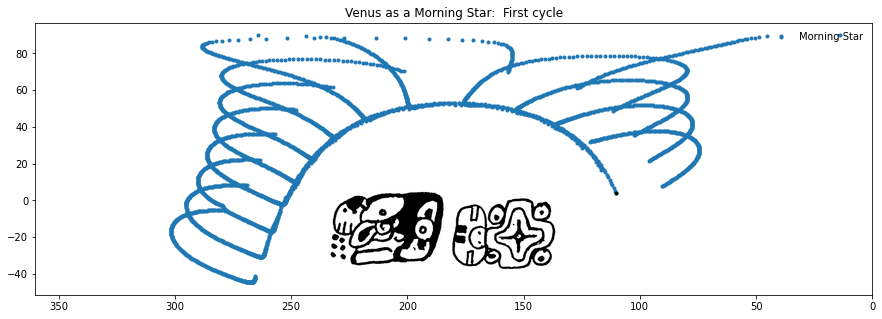

In [27]:
plot_mayan(0, 0, ext='First cycle')

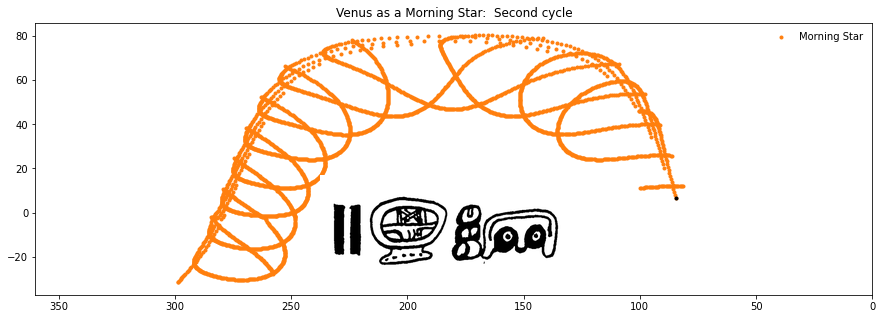

In [28]:
plot_mayan(1, 0, ext='Second cycle')

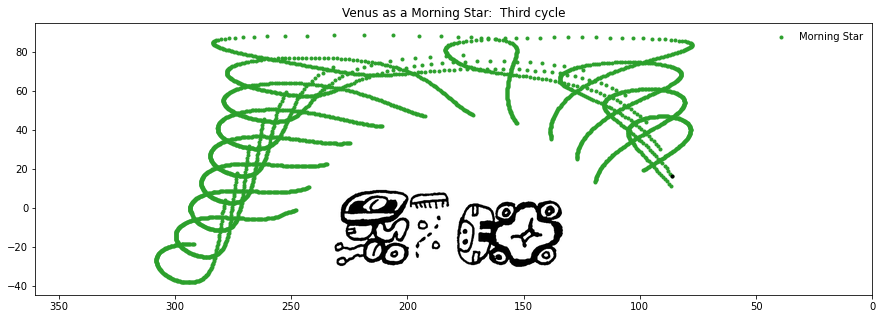

In [29]:
plot_mayan(2, 0, ext='Third cycle')

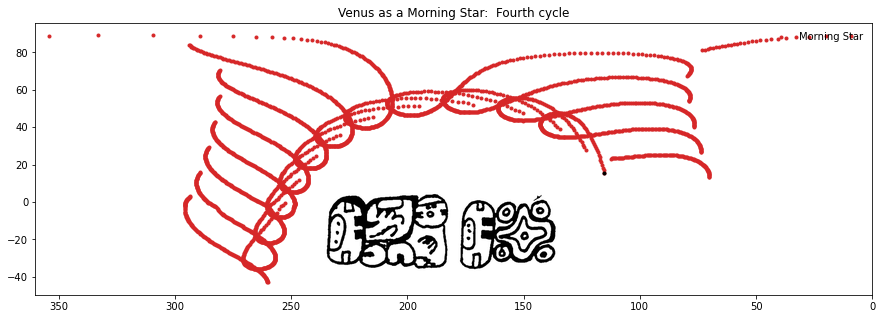

In [30]:
plot_mayan(3, 0, ext='Fourth cycle')

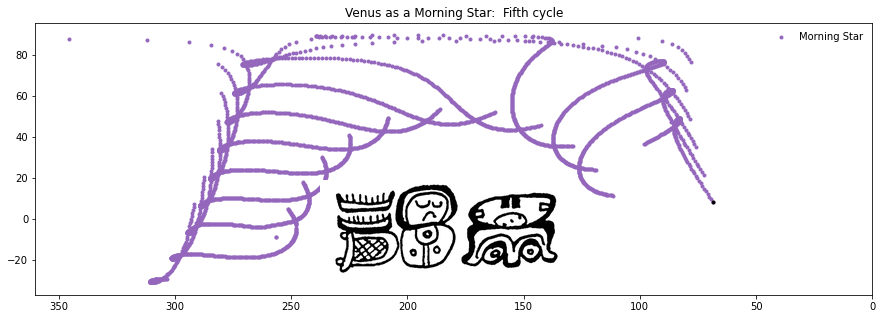

In [31]:
plot_mayan(4, 0, ext='Fifth cycle')

At this point, after eight years, Venus and the Sun return to the same point in the sky and the dance begins all over again!  The Mayans documented this behaviour religiously, in what is today known as the Dresden Codex:

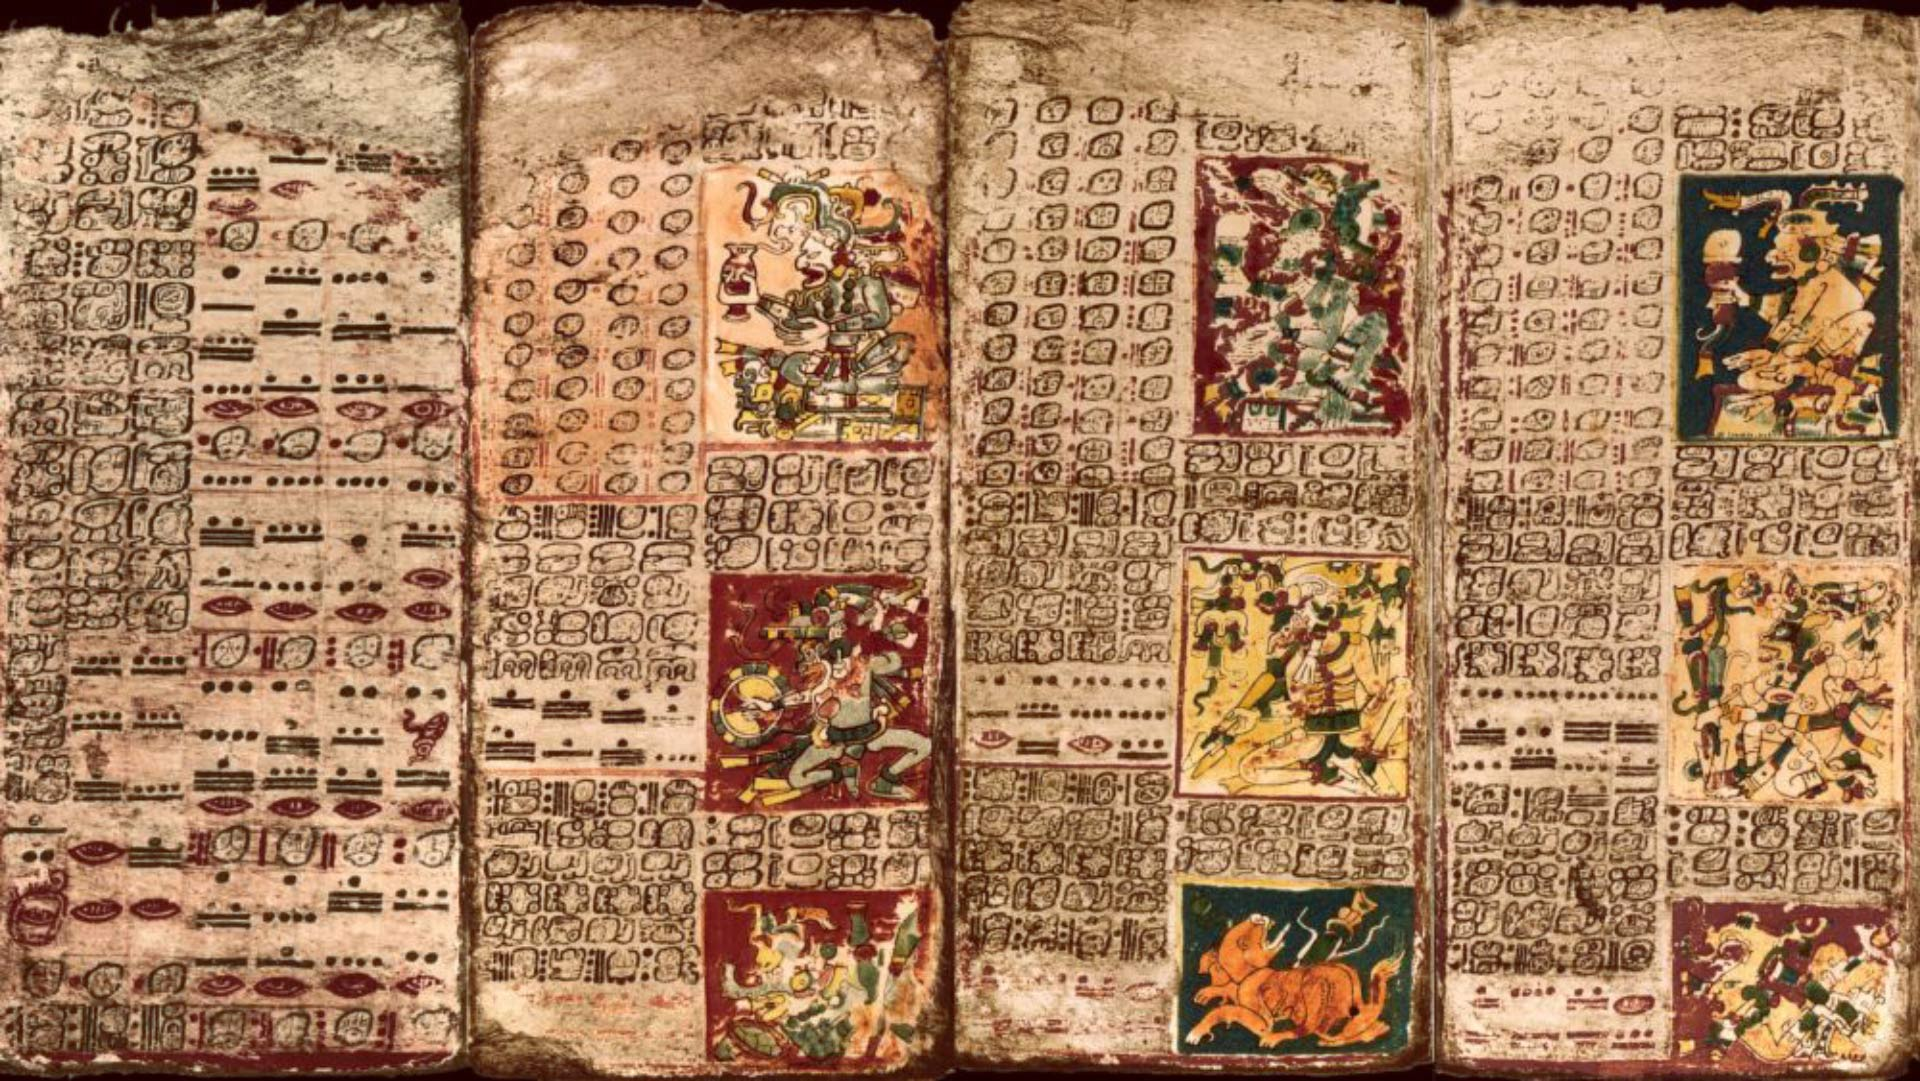

In [32]:
Image(filename='images/DresdenCodex.jpg')

For page after page, in the Codex, the Mayans recorded the dates at which Venus switched from a Morning Star, to a Superior Conjuction, to an Evening Star, to an Inferior Injunction and so on, with incredible accuracy.  Compared to modern accuracy, then were often within one to a few days!  The Mayans didn't do fractions, so it was hard to agree exactly.  

Each page would have a row of four dates, marking these transitions.  The same row on five consectutive pages would record these same transitions for the five synodic cycles (of 584 days) completing a Lub, or 2920 days, when the sun and venus would begin the same dance again. 

After thirteen lubs, or 104 Haab (years), the table returns to its Lubay or "great resting place" where all the cycles begin again - the sun and venus have returned to the starting positions on the first day of a Tzolk'in year.  The whole cycle then repeats itself.  The Universe must have seemed in perfect harmony with their world on that _Ahaw_ day when the Lubay was reached and the thirteen cycles of Venus begin again. 

In [33]:
# print(365. * 104, 260 * 146., 584. * 65., 2920. * 13)

# BREAKING NEWS (!)

Perhaps the Mayans were right all along!  In an unexpected twist, on Monday Sep. 14th 2020, scientists annnounced the first tantalising evidence for life on Venus - just in time for National Hispanic Month and the DESI High Challenge! 

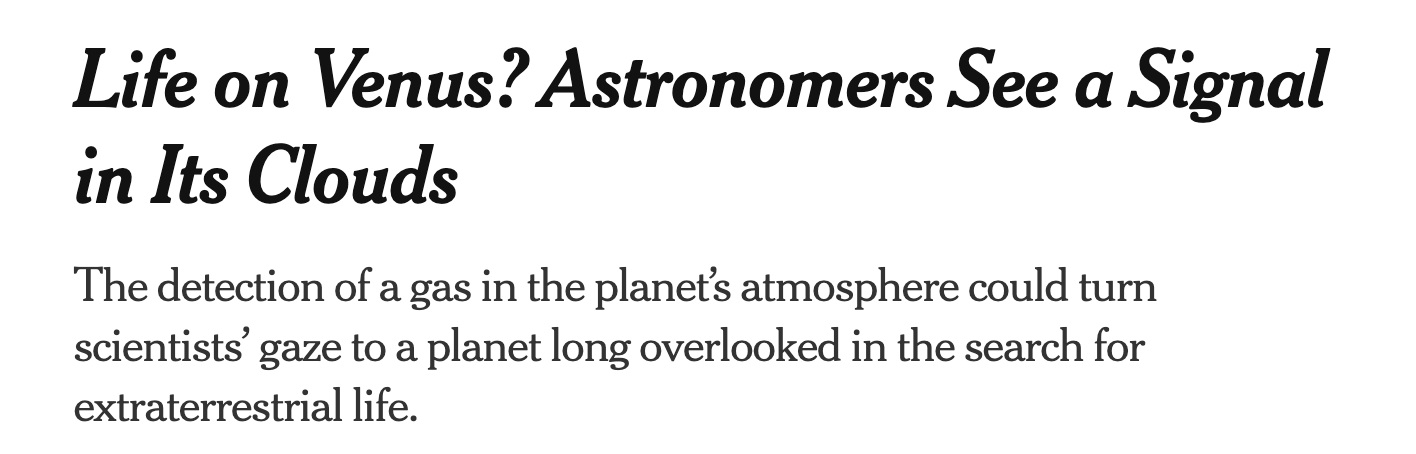

In [38]:
Image(filename='images/VenusLife.png')

Check out [here](https://www.nytimes.com/2020/09/14/science/venus-life-clouds.html) to start learning more.

# Hispanic American in DESI

This notebook is currently just an example of what you can do.  To make it much better, we'd like you to submit your own material!  This could add to the Mayan example above using pyephem, approach the work of the first professional Hispanic American astronomers or be a fun python experiment highlighting your work in DESI.  If you submit an entry, or even if you don't(!), add an introduction to yourself and your interests in our dedicated folder.  Alma and Mariana, our awesome DESI High translators, have given examples to show you how.     

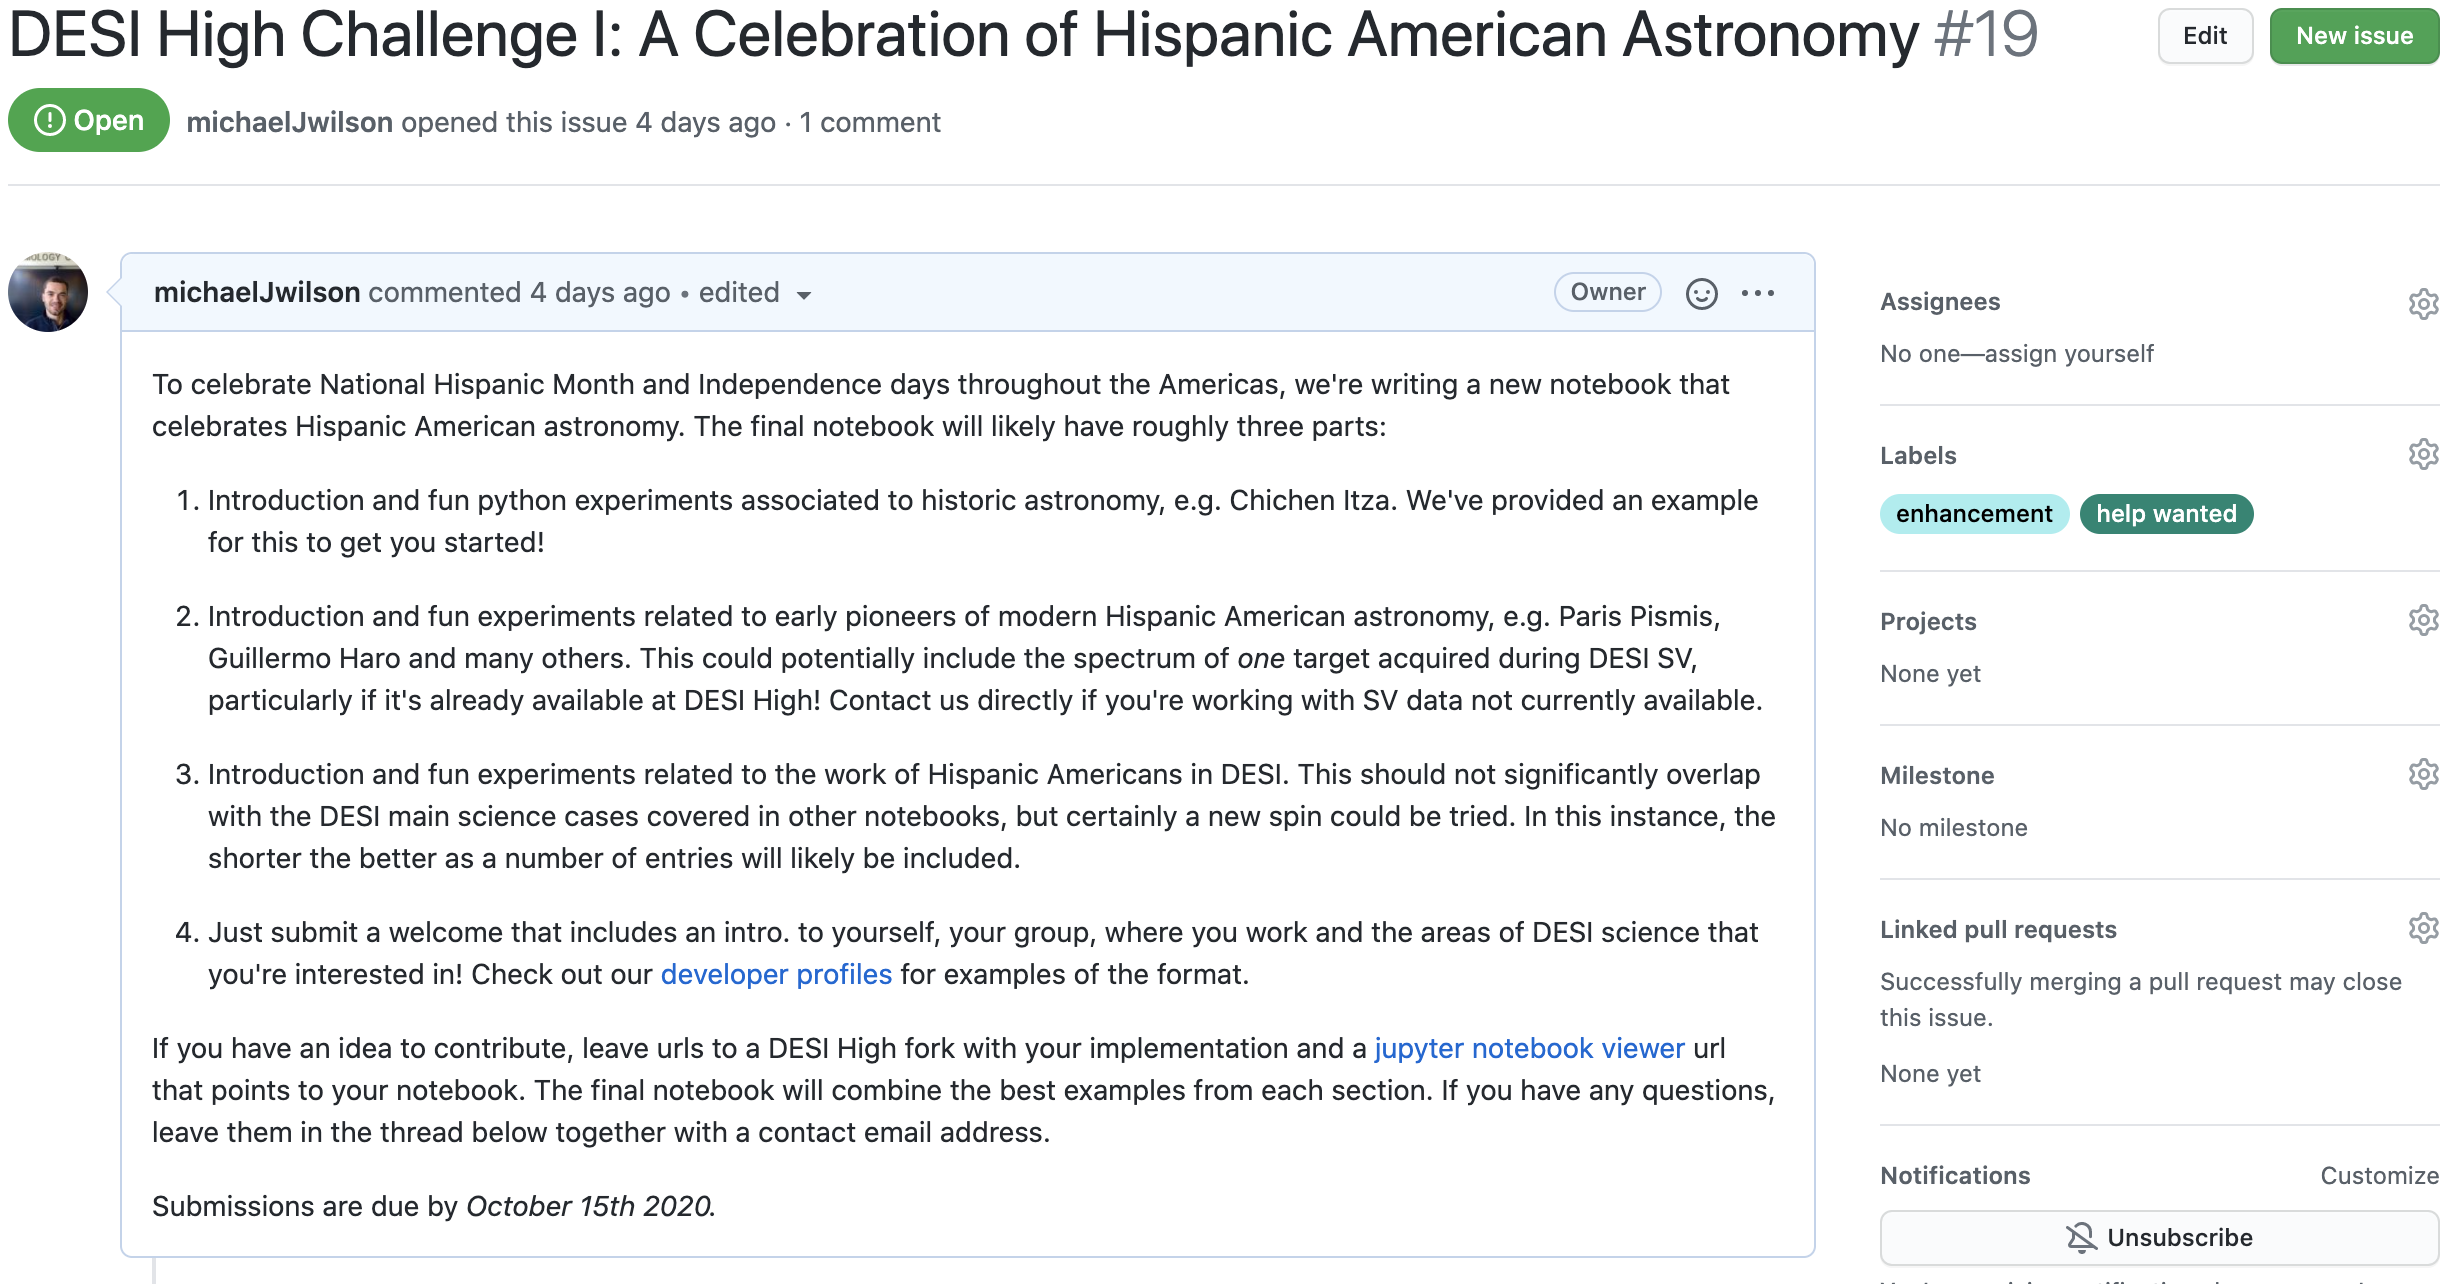

In [42]:
Image(filename='images/Challenge1.png')

Head over to https://github.com/michaelJwilson/DESI-HighSchool/issues/19 to get started!